# Euler Method for Solving Ordinary Differential Equations

## Introduction

The **Euler method** is the simplest numerical technique for solving initial value problems (IVPs) of ordinary differential equations (ODEs). Named after Leonhard Euler, this method provides the foundation for understanding more sophisticated numerical integration schemes.

## Mathematical Foundation

### The Initial Value Problem

Consider an ODE of the form:

$$\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0$$

where $f(t, y)$ is a known function, and we seek the solution $y(t)$ given the initial condition $y_0$ at time $t_0$.

### Derivation of the Euler Method

The Euler method is derived from the Taylor series expansion of $y(t)$ about $t_n$:

$$y(t_{n+1}) = y(t_n) + h\frac{dy}{dt}\bigg|_{t_n} + \frac{h^2}{2}\frac{d^2y}{dt^2}\bigg|_{\xi} + \mathcal{O}(h^3)$$

where $h = t_{n+1} - t_n$ is the step size and $\xi \in [t_n, t_{n+1}]$.

Truncating after the first-order term and using the ODE definition:

$$y_{n+1} = y_n + h \cdot f(t_n, y_n)$$

This is the **forward Euler method** or **explicit Euler method**.

### Local and Global Truncation Error

The **local truncation error** (LTE) is:

$$\tau_n = \frac{h^2}{2}y''(\xi) = \mathcal{O}(h^2)$$

The **global truncation error** (GTE) accumulates over $N = (t_f - t_0)/h$ steps:

$$E = N \cdot \mathcal{O}(h^2) = \frac{t_f - t_0}{h} \cdot \mathcal{O}(h^2) = \mathcal{O}(h)$$

Thus, the Euler method is a **first-order method**.

### Stability Analysis

For the test equation $y' = \lambda y$ (where $\lambda \in \mathbb{C}$), the Euler method gives:

$$y_{n+1} = (1 + h\lambda)y_n$$

The method is stable when $|1 + h\lambda| \leq 1$, which defines the **stability region** in the complex $h\lambda$-plane as a disk of radius 1 centered at $(-1, 0)$.

## Implementation

We will implement the Euler method and apply it to several classical ODEs to demonstrate its behavior.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def euler_method(f, t_span, y0, h):
    """
    Solve an ODE using the forward Euler method.
    
    Parameters:
    -----------
    f : callable
        Function f(t, y) defining dy/dt = f(t, y)
    t_span : tuple
        (t_start, t_end) time interval
    y0 : float or array
        Initial condition
    h : float
        Step size
    
    Returns:
    --------
    t : ndarray
        Time points
    y : ndarray
        Solution values at time points
    """
    t_start, t_end = t_span
    n_steps = int(np.ceil((t_end - t_start) / h))
    
    t = np.zeros(n_steps + 1)
    y0 = np.atleast_1d(y0)
    y = np.zeros((n_steps + 1, len(y0)))
    
    t[0] = t_start
    y[0] = y0
    
    for i in range(n_steps):
        t[i + 1] = t[i] + h
        y[i + 1] = y[i] + h * np.atleast_1d(f(t[i], y[i]))
    
    return t, y.squeeze()

## Example 1: Exponential Decay

Consider the decay equation:

$$\frac{dy}{dt} = -ky, \quad y(0) = y_0$$

with analytical solution $y(t) = y_0 e^{-kt}$.

In [2]:
# Parameters
k = 0.5  # decay constant
y0_decay = 10.0
t_span_decay = (0, 10)

# Define the ODE
def decay_ode(t, y):
    return -k * y

# Analytical solution
def decay_analytical(t):
    return y0_decay * np.exp(-k * t)

# Solve with different step sizes
step_sizes = [1.0, 0.5, 0.1]
t_exact = np.linspace(0, 10, 1000)
y_exact = decay_analytical(t_exact)

print("Exponential Decay: dy/dt = -0.5y, y(0) = 10")
print("="*50)

for h in step_sizes:
    t_euler, y_euler = euler_method(decay_ode, t_span_decay, y0_decay, h)
    error = np.abs(y_euler[-1] - decay_analytical(t_euler[-1]))
    print(f"h = {h}: Final value = {y_euler[-1]:.6f}, Error = {error:.6f}")

Exponential Decay: dy/dt = -0.5y, y(0) = 10
h = 1.0: Final value = 0.009766, Error = 0.057614
h = 0.5: Final value = 0.031712, Error = 0.035667
h = 0.1: Final value = 0.059205, Error = 0.008174


## Example 2: Simple Harmonic Oscillator

The simple harmonic oscillator is described by:

$$\frac{d^2x}{dt^2} = -\omega^2 x$$

Converting to a first-order system with $v = dx/dt$:

$$\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\omega^2 x
\end{cases}$$

For $x(0) = 1$, $v(0) = 0$, the analytical solution is $x(t) = \cos(\omega t)$.

In [3]:
# Parameters
omega = 2 * np.pi  # angular frequency (1 Hz)
t_span_sho = (0, 5)
y0_sho = [1.0, 0.0]  # [x0, v0]

def sho_ode(t, y):
    x, v = y
    return np.array([v, -omega**2 * x])

def sho_analytical(t):
    return np.cos(omega * t)

# Solve with Euler method
h_sho = 0.001
t_euler_sho, y_euler_sho = euler_method(sho_ode, t_span_sho, y0_sho, h_sho)

# Compare with scipy's solve_ivp (RK45)
sol_rk45 = solve_ivp(sho_ode, t_span_sho, y0_sho, method='RK45', dense_output=True)
t_rk45 = np.linspace(0, 5, 1000)
y_rk45 = sol_rk45.sol(t_rk45)[0]

# Analytical solution
t_exact_sho = np.linspace(0, 5, 1000)
y_exact_sho = sho_analytical(t_exact_sho)

print("Simple Harmonic Oscillator: d²x/dt² = -ω²x")
print(f"ω = 2π rad/s, h = {h_sho}")
print("="*50)

Simple Harmonic Oscillator: d²x/dt² = -ω²x
ω = 2π rad/s, h = 0.001


## Example 3: Logistic Growth

The logistic equation models population growth with carrying capacity:

$$\frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right)$$

where $r$ is the growth rate and $K$ is the carrying capacity.

The analytical solution is:

$$P(t) = \frac{K P_0 e^{rt}}{K + P_0(e^{rt} - 1)}$$

In [4]:
# Parameters
r = 0.5  # growth rate
K = 100  # carrying capacity
P0 = 10  # initial population
t_span_logistic = (0, 20)

def logistic_ode(t, P):
    return r * P * (1 - P / K)

def logistic_analytical(t, P0, r, K):
    return K * P0 * np.exp(r * t) / (K + P0 * (np.exp(r * t) - 1))

# Solve with Euler method
h_logistic = 0.1
t_euler_log, P_euler = euler_method(logistic_ode, t_span_logistic, P0, h_logistic)

# Analytical solution
t_exact_log = np.linspace(0, 20, 1000)
P_exact = logistic_analytical(t_exact_log, P0, r, K)

print("Logistic Growth: dP/dt = rP(1 - P/K)")
print(f"r = {r}, K = {K}, P₀ = {P0}, h = {h_logistic}")
print("="*50)

Logistic Growth: dP/dt = rP(1 - P/K)
r = 0.5, K = 100, P₀ = 10, h = 0.1


## Convergence Analysis

We verify the first-order convergence of the Euler method by examining the global error as a function of step size.

In [5]:
# Convergence study using exponential decay
step_sizes_conv = np.logspace(-3, 0, 20)
errors = []

t_final = 5.0
y_exact_final = y0_decay * np.exp(-k * t_final)

for h in step_sizes_conv:
    t_euler, y_euler = euler_method(decay_ode, (0, t_final), y0_decay, h)
    error = np.abs(y_euler[-1] - y_exact_final)
    errors.append(error)

errors = np.array(errors)

# Fit to determine order of convergence
log_h = np.log10(step_sizes_conv)
log_err = np.log10(errors)
coeffs = np.polyfit(log_h, log_err, 1)
order = coeffs[0]

print(f"Measured order of convergence: {order:.3f}")
print(f"Expected order: 1.0")

Measured order of convergence: 1.015
Expected order: 1.0


## Comprehensive Visualization

We now create a comprehensive figure showing all examples and the convergence analysis.

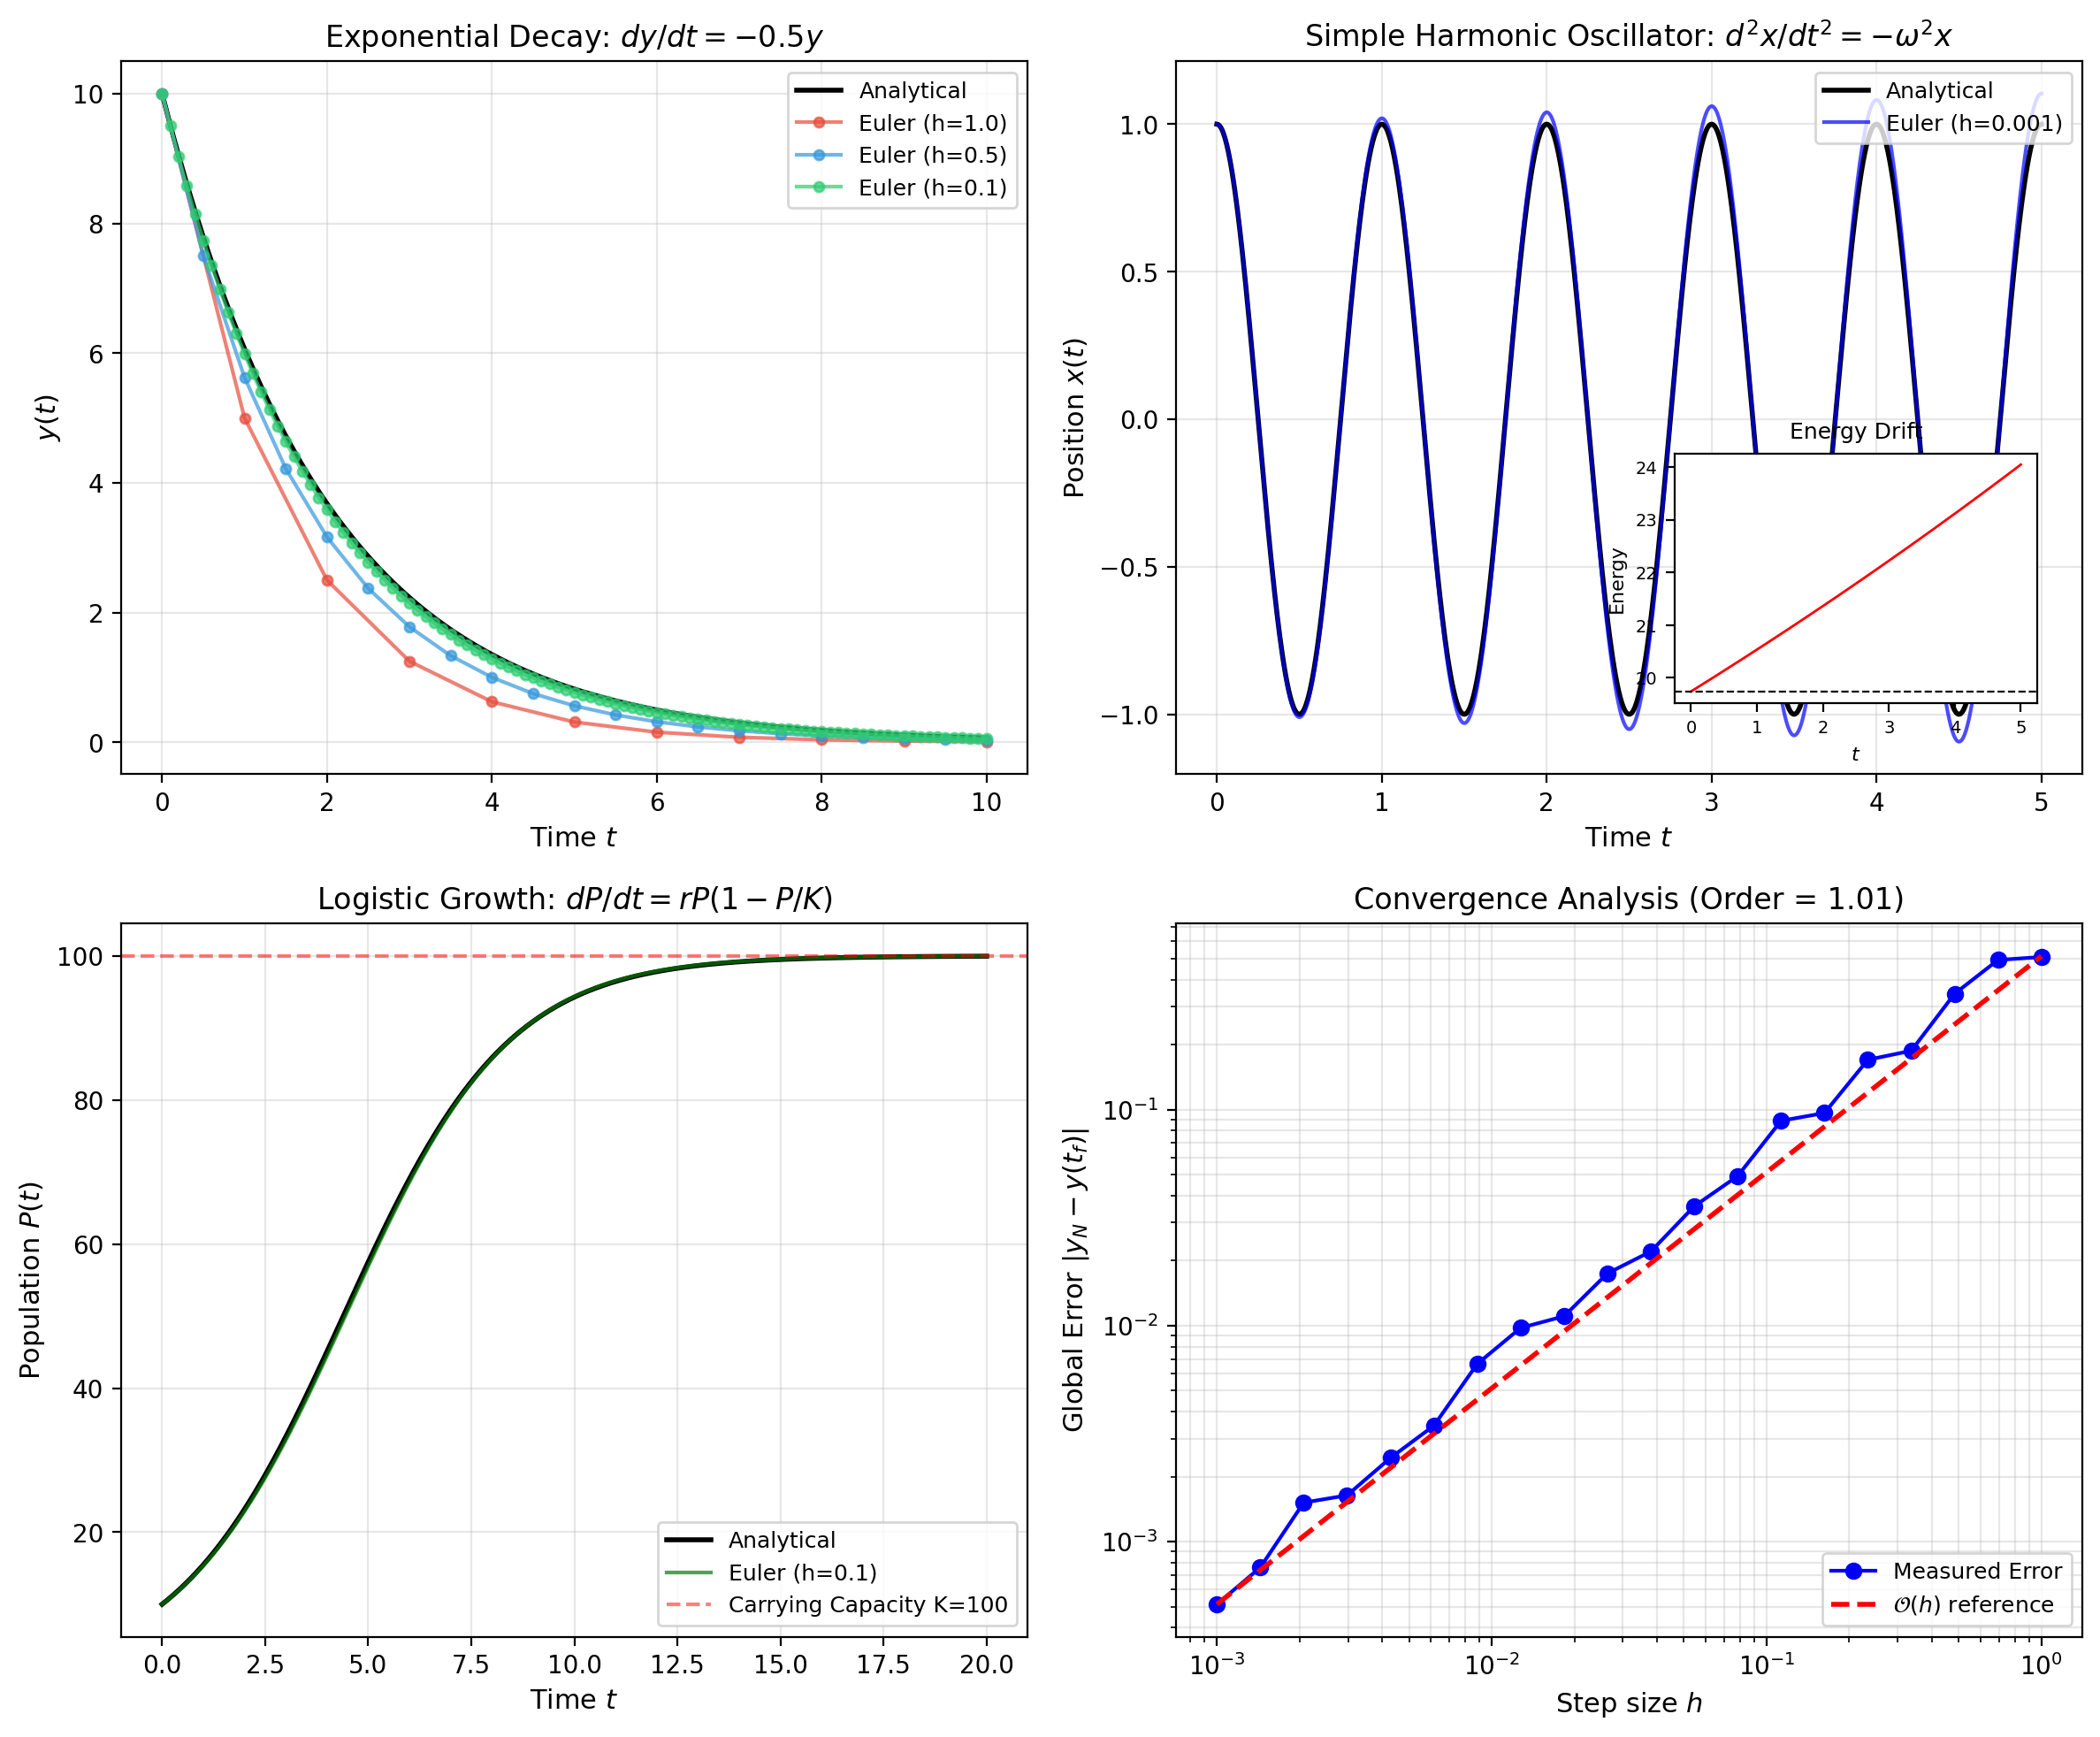


Figure saved to 'plot.png'


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Exponential Decay with different step sizes
ax1 = axes[0, 0]
ax1.plot(t_exact, y_exact, 'k-', linewidth=2, label='Analytical')
colors = ['#e74c3c', '#3498db', '#2ecc71']
for h, color in zip(step_sizes, colors):
    t_euler, y_euler = euler_method(decay_ode, t_span_decay, y0_decay, h)
    ax1.plot(t_euler, y_euler, 'o-', markersize=4, color=color, 
             alpha=0.7, label=f'Euler (h={h})')
ax1.set_xlabel('Time $t$', fontsize=11)
ax1.set_ylabel('$y(t)$', fontsize=11)
ax1.set_title('Exponential Decay: $dy/dt = -0.5y$', fontsize=12)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Simple Harmonic Oscillator
ax2 = axes[0, 1]
ax2.plot(t_exact_sho, y_exact_sho, 'k-', linewidth=2, label='Analytical')
ax2.plot(t_euler_sho, y_euler_sho[:, 0], 'b-', alpha=0.7, 
         linewidth=1.5, label=f'Euler (h={h_sho})')
ax2.set_xlabel('Time $t$', fontsize=11)
ax2.set_ylabel('Position $x(t)$', fontsize=11)
ax2.set_title('Simple Harmonic Oscillator: $d^2x/dt^2 = -\\omega^2 x$', fontsize=12)
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)

# Inset: Energy drift in SHO
# Calculate total energy E = 0.5*v^2 + 0.5*omega^2*x^2
energy_euler = 0.5 * y_euler_sho[:, 1]**2 + 0.5 * omega**2 * y_euler_sho[:, 0]**2
ax2_inset = ax2.inset_axes([0.55, 0.1, 0.4, 0.35])
ax2_inset.plot(t_euler_sho, energy_euler, 'r-', linewidth=1)
ax2_inset.axhline(y=0.5*omega**2, color='k', linestyle='--', linewidth=0.8)
ax2_inset.set_xlabel('$t$', fontsize=8)
ax2_inset.set_ylabel('Energy', fontsize=8)
ax2_inset.set_title('Energy Drift', fontsize=9)
ax2_inset.tick_params(labelsize=7)

# Plot 3: Logistic Growth
ax3 = axes[1, 0]
ax3.plot(t_exact_log, P_exact, 'k-', linewidth=2, label='Analytical')
ax3.plot(t_euler_log, P_euler, 'g-', alpha=0.7, linewidth=1.5, 
         label=f'Euler (h={h_logistic})')
ax3.axhline(y=K, color='r', linestyle='--', alpha=0.5, label=f'Carrying Capacity K={K}')
ax3.set_xlabel('Time $t$', fontsize=11)
ax3.set_ylabel('Population $P(t)$', fontsize=11)
ax3.set_title('Logistic Growth: $dP/dt = rP(1-P/K)$', fontsize=12)
ax3.legend(loc='lower right', fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Convergence Analysis
ax4 = axes[1, 1]
ax4.loglog(step_sizes_conv, errors, 'bo-', markersize=6, label='Measured Error')
# Reference line for first-order convergence
h_ref = np.array([step_sizes_conv[0], step_sizes_conv[-1]])
err_ref = errors[0] * (h_ref / step_sizes_conv[0])**1
ax4.loglog(h_ref, err_ref, 'r--', linewidth=2, label=r'$\mathcal{O}(h)$ reference')
ax4.set_xlabel('Step size $h$', fontsize=11)
ax4.set_ylabel('Global Error $|y_N - y(t_f)|$', fontsize=11)
ax4.set_title(f'Convergence Analysis (Order = {order:.2f})', fontsize=12)
ax4.legend(loc='lower right', fontsize=9)
ax4.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('euler_method_odes_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Summary

The Euler method, while being the simplest numerical ODE solver, demonstrates several important characteristics:

1. **First-order accuracy**: The global error is $\mathcal{O}(h)$, requiring small step sizes for accurate solutions.

2. **Energy drift**: For conservative systems like the harmonic oscillator, the Euler method does not conserve energy, leading to systematic drift over time.

3. **Stability limitations**: The method has a limited stability region, requiring step sizes that satisfy $h|\lambda| < 2$ for real negative eigenvalues.

4. **Educational value**: Despite its limitations, the Euler method serves as an excellent pedagogical tool for understanding numerical integration concepts.

### Extensions and Improvements

For practical applications, consider:
- **Backward Euler** (implicit): Better stability for stiff equations
- **Runge-Kutta methods**: Higher-order accuracy (RK4 is $\mathcal{O}(h^4)$)
- **Symplectic integrators**: Energy-conserving methods for Hamiltonian systems
- **Adaptive methods**: Automatic step size control for efficiency